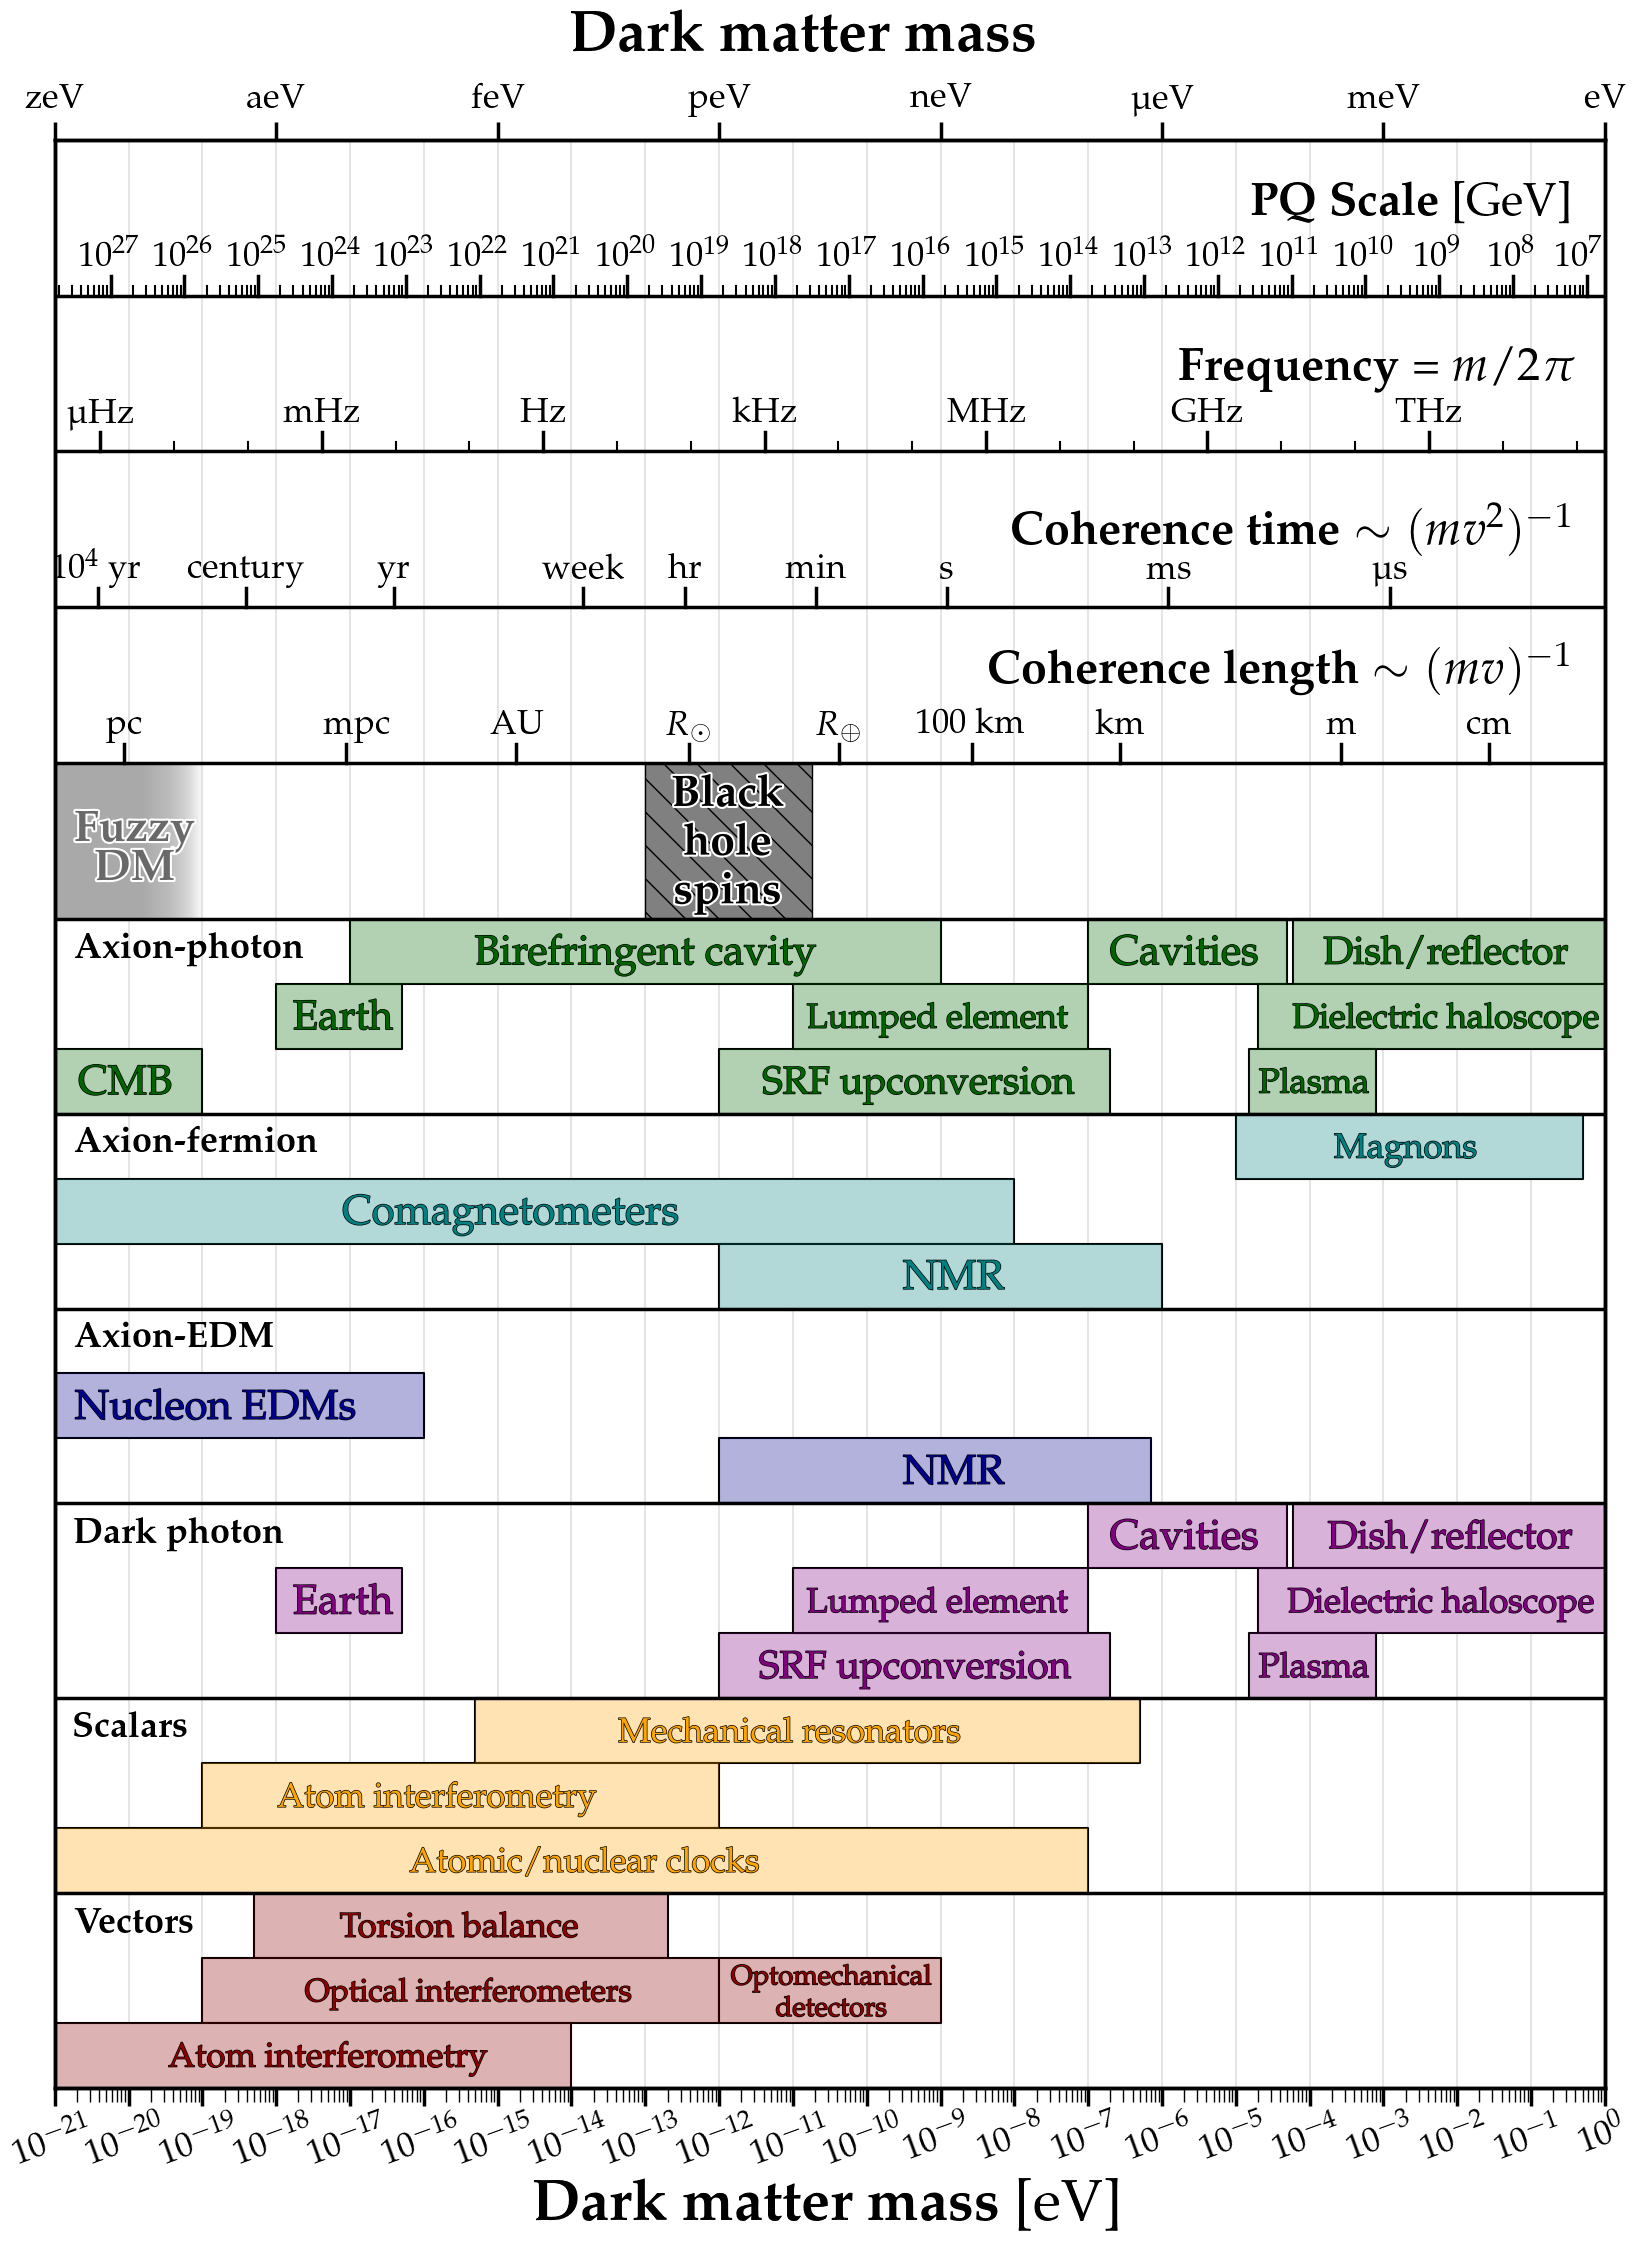

In [1]:
%matplotlib inline
from PlotFuncs import MySaveFig, FigSetup, line_background
from PlotFuncs_ScalarVector import FuzzyDM

import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *


lw = 2.5
tfs = 25
m_min = 1e-21
m_max = 1

plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],})

fig = plt.figure(figsize=(20,20*sqrt(1.6)))
ax = fig.add_subplot(111)
ax.tick_params(which='major',direction='out',width=2.5,length=13,top=True,pad=3)
ax.tick_params(which='minor',direction='out',width=1,length=10,top=True)

ax.set_xscale('log')
ax.set_xlim([m_min,m_max])
ax.set_ylim([0,1])
ax.set_yticks([])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.xaxis.set_tick_params(labeltop=False,rotation=20,pad=5)
plt.xticks(rotation=20);

ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim([m_min,m_max])
ax2.tick_params(which='major',direction='out',width=2.5,length=13,pad=3)
ax2.tick_params(which='minor',direction='out',width=1,length=10)
ax2.set_xticks([1e-21,1e-18,1e-15,1e-12,1e-9,1e-6,1e-3,1])
ax2.set_xticklabels(['zeV','aeV','feV','peV','neV',r'\textmu eV','meV','eV'])

plt.sca(ax)

y1 = 0.92
tl = 0.01
plt.axhline(y1,lw=lw,color='k')
fa = logspace(7,27,27-7+1)
for i in range(len(fa)):
    plt.plot(1e12/(fa[i]/5.7e-6)*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    for x in range(2,10):
        plt.plot(x*1e12/(fa[i]/5.7e-6)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
    if fa[i]==1e7:
        plt.text(0.8*1e12/(fa[i]/5.7e-6),y1+1.5*tl,r'$10^{'+str(int(log10(fa[i])))+'}$',ha='center',clip_on=True)
    else:
        plt.text(1e12/(fa[i]/5.7e-6),y1+1.5*tl,r'$10^{'+str(int(log10(fa[i])))+'}$',ha='center',clip_on=True)
for x in range(2,10):
    plt.plot(0.1*x*1e12/(fa[-1]/5.7e-6)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
                
y1 -= 0.08
tl = 0.01
plt.axhline(y1,lw=lw,color='k')
nu_secs = array([1e-9,1e-6,1e-3,1,1e3,1e6,1e9,1e12])
nu_labs = array(['neV',r'\textmu Hz','mHz','Hz','kHz','MHz','GHz','THz'])
for i in range(len(nu_secs)):
    plt.plot(nu_secs[i]/(241.8*1e12)*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    plt.text(nu_secs[i]/(241.8*1e12),y1+1.5*tl,nu_labs[i],ha='center',clip_on=True)
    for x in [10,100]:
        plt.plot(x*nu_secs[i]/(241.8*1e12)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
       
    
v = (220e3/3e8)
y1 -= 0.08
tl = 0.01
s2eV = 1/6.5821e-16

plt.axhline(y1,lw=lw,color='k')
T_secs = array([1e-6,1e-3,1,60,3600,3600*24,365*3600*24,100*365*3600*24,1e4*365*3600*24])
T_labs = array([r'\textmu s','ms','s','min','hr','week','yr','century','$\,\, 10^4$ yr'])
for i in range(len(T_secs)):
    m = 1/(T_secs[i]*s2eV*v**2)
    plt.plot(m*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    plt.text(m,y1+1.5*tl,T_labs[i],ha='center',clip_on=True)
    
y1 -= 0.08
m2eV = 1/1.9732705e-7
plt.axhline(y1,lw=lw,color='k')
L_m = array([1e-2,1,1e3,100e3,6378.1e3,696340e3,1.496e+11,1e-3*3.086e+16,3.086e+16])
L_labs = array(['cm','m','km',r'100 km',r'$R_\oplus$',r'$R_\odot$','AU','mpc','pc'])
for i in range(len(L_m)):
    m = 1/(L_m[i]*m2eV*v)
    plt.plot(m*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    if L_m[i]==1e-3*3.086e+16:
        plt.text(m*1.4,y1+1.5*tl,L_labs[i],ha='center',clip_on=True)
    else:
        plt.text(m,y1+1.5*tl,L_labs[i],ha='center',clip_on=True)

    
lfs = 42
ax.set_xlabel(r'{\bf Dark matter mass} [eV]',fontsize=lfs)
plt.gcf().text(0.5,0.915,r'{\bf Dark matter mass}',fontsize=lfs,ha='center')

plt.gcf().text(0.885,0.85,r'{\bf PQ Scale} [GeV]',fontsize=lfs*0.8,ha='right')
plt.gcf().text(0.885,0.785,r'{\bf Frequency} = $m/2\pi$',fontsize=lfs*0.8,ha='right')
plt.gcf().text(0.885,0.72,r'{\bf Coherence time} $\sim  (mv^2)^{-1}$',fontsize=lfs*0.8,ha='right')
plt.gcf().text(0.885,0.665,r'{\bf Coherence length} $\sim (mv)^{-1}$',fontsize=lfs*0.8,ha='right')





# Side labels
#ax.axhline(0.65,lw=2.5,color='k',zorder=-10)
ax.axhline(0.6,lw=2.5,color='k',zorder=-10)
ax.axhline(0.5,lw=2.5,color='k',zorder=-10)
ax.axhline(0.4,lw=2.5,color='k',zorder=-10)
ax.axhline(0.3,lw=2.5,color='k',zorder=-10)
ax.axhline(0.2,lw=2.5,color='k',zorder=-10)
ax.axhline(0.1,lw=2.5,color='k',zorder=-10)
lfs = 26
plt.text(m_min*1.8,0.58,r'{\bf Axion-photon}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.48,r'{\bf Axion-fermion}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.38,r'{\bf Axion-EDM}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.28,r'{\bf Dark photon}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.18,r'{\bf Scalars}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.08,r'{\bf Vectors}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')


# Black hole spins
m1 = 1e-13
m2 = 1.8e-11
plt.fill_between([m1,m2],[0.6,0.6],y2=0.68,color='gray',alpha=1,zorder=-99,hatch='\\',edgecolor='k')
plt.text(1.3e-12,0.658,r'{\bf Black}',color='k',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))
plt.text(1.3e-12,0.633,r'{\bf hole}',color='k',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))
plt.text(1.3e-12,0.608,r'{\bf spins}',color='k',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))


# Fuzzy DM
FuzzyDM(ax,ymin=0.6,ymax=0.68,m_min=1e-21,m_max=1e-19,rotation=90,
        g_label=0.25,text_label='',
        alpha=0.05,facecolor='darkgray',zorder=-99,
        text_shift=[0.1,1],text_col='w',fs=40,
        path_effects=line_background(2.5,'k'))
plt.text(1.2e-20,0.64,r'{\bf Fuzzy}',color='dimgray',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))
plt.text(1.2e-20,0.62,r'{\bf DM}',color='dimgray',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))



alph = 0.25
zo = -11

# Axion-photon
col = 'darkgreen'
y1 = 0.6
yc = 0.002
# cavities
plt.fill_between([1e-7,5e-5],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-7,5e-5],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(2e-6,y1-0.5/30-yc,'Cavities',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Eaarth B-field
plt.fill_between([1e-18,5e-17],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-18,5e-17],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(0.8e-17,y1-1.5/30-yc,'Earth',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# CMB
plt.fill_between([1e-21,1e-19],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-21,1e-19],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(9e-21,y1-2.5/30-yc,'CMB',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Birefringent
plt.fill_between([1e-17,1e-9],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-17,1e-9],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1e-13,y1-0.5/30-yc,'Birefringent cavity',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# SRF
plt.fill_between([1e-12,2e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-12,2e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(5e-10,y1-2.5/30-yc,'SRF upconversion',fontsize=28,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Lumped element
plt.fill_between([1e-11,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-11,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(9e-10,y1-1.5/30-yc,'Lumped element',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dish/reflector
plt.fill_between([6e-5,1e0],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([6e-5,1e0],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(7e-3,y1-0.5/30-yc,'Dish/reflector',fontsize=28,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dielectric 
plt.fill_between([2e-5,1],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([2e-5,1],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(7e-3,y1-1.5/30-yc,'Dielectric haloscope',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Plasma 
plt.fill_between([1.5e-5,8e-4],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1.5e-5,8e-4],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.15e-4,y1-2.5/30-yc,'Plasma',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')


# Axion-fermion
col = 'teal'
y1 = 0.5
# Magnon/polariton
plt.fill_between([1e-5,5e-1],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-5,5e-1],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(2e-3,y1-0.5/30-yc,'Magnons',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Comagnetometers
plt.fill_between([1e-21,1e-8],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-21,1e-8],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.5e-15,y1-1.5/30-yc,'Comagnetometers',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# NMR
plt.fill_between([1e-12,1e-6],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-12,1e-6],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.5e-9,y1-2.5/30-yc,'NMR',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')




# Axion-EDM
col = 'darkblue'
y1 = 0.4

plt.fill_between([1e-21,1e-16],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-21,1e-16],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.5e-19,y1-1.5/30-yc,'Nucleon EDMs',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-12,7e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-12,7e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.5e-9,y1-2.5/30-yc,'NMR',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')





# Dark photon
col = 'purple'
y1 = 0.3
# Earth
plt.fill_between([1e-18,5e-17],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-18,5e-17],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(0.8e-17,y1-1.5/30-yc,'Earth',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# SRF
plt.fill_between([1e-12,2e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-12,2e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(4.5e-10,y1-2.5/30-yc,'SRF upconversion',fontsize=28,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Lumped element
plt.fill_between([1e-11,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-11,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(9e-10,y1-1.5/30-yc,'Lumped element',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dish/reflector
plt.fill_between([6e-5,1e0],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([6e-5,1e0],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(8e-3,y1-0.5/30-yc,'Dish/reflector',fontsize=28,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dielectric 
plt.fill_between([2e-5,1],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([2e-5,1],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(6e-3,y1-1.5/30-yc,'Dielectric haloscope',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Plasma 
plt.fill_between([1.5e-5,8e-4],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1.5e-5,8e-4],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.15e-4,y1-2.5/30-yc,'Plasma',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# cavities
plt.fill_between([1e-7,5e-5],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-7,5e-5],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(2e-6,y1-0.5/30-yc,'Cavities',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')



# Scalars
col = 'orange'
y1 = 0.2

plt.fill_between([5e-16,5e-7],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([5e-16,5e-7],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(9e-12,y1-0.5/30-yc,'Mechanical resonators',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-19,1e-12],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-19,1e-12],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.5e-16,y1-1.5/30-yc,'Atom interferometry',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-21,1e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-21,1e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(1.5e-14,y1-2.5/30-yc,'Atomic/nuclear clocks',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Vectors
col = 'darkred'
y1 = 0.1

plt.fill_between([5e-19,2e-13],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([5e-19,2e-13],[y1-1/30,y1-1/30],y2=y1,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(3e-16,y1-0.5/30-yc,'Torsion balance',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-19,1e-12],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-19,1e-12],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(4e-16,y1-1.5/30-yc,'Optical interferometers',fontsize=23,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-21,1e-14],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-21,1e-14],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(0.5e-17,y1-2.5/30-yc,'Atom interferometry',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-12,1e-9],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
plt.fill_between([1e-12,1e-9],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
plt.text(0.33e-10,y1-1.5/30-yc,'Optomechanical \n detectors',fontsize=20,color=col,path_effects=line_background(1,'k'),ha='center',va='center')


for m in arange(-21,1):
    plt.plot([10.0**m,10.0**m],[0,1],'k-',alpha=0.1,zorder=-100)

MySaveFig(fig,'Cheatsheet')

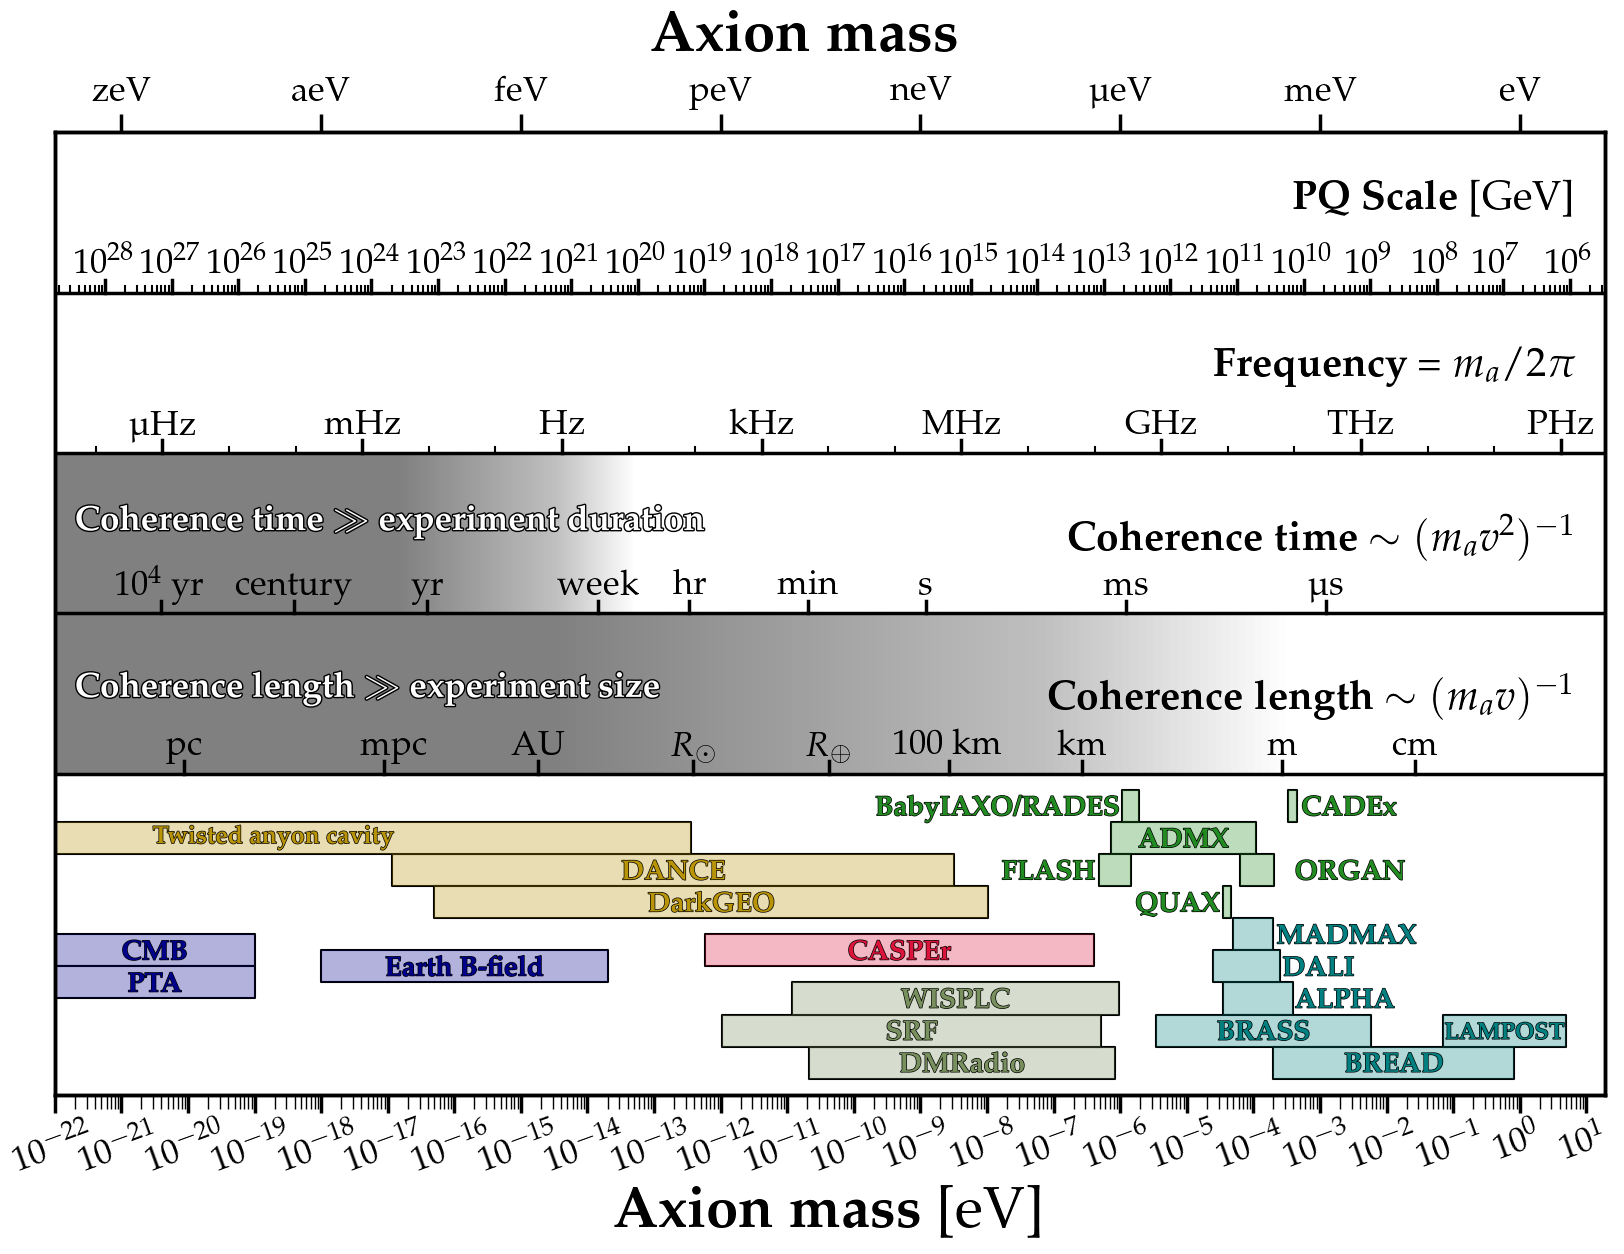

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
from PlotFuncs import MySaveFig,line_background
from PlotFuncs_ScalarVector import FuzzyDM


lw = 2.5
tfs = 25
m_min = 1e-22
m_max = 19

plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],})

fig = plt.figure(figsize=(20,12.5))
ax = fig.add_subplot(111)
ax.tick_params(which='major',direction='out',width=2.5,length=13,top=True,pad=3)
ax.tick_params(which='minor',direction='out',width=1,length=10,top=True)

ax.set_xscale('log')
ax.set_xlim([m_min,m_max])
ax.set_ylim([-0.5,1])
ax.set_yticks([])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.xaxis.set_tick_params(labeltop=False,rotation=20,pad=5)
plt.xticks(rotation=20)

ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim([m_min,m_max])
ax2.tick_params(which='major',direction='out',width=2.5,length=13,pad=3)
ax2.tick_params(which='minor',direction='out',width=1,length=10)
ax2.set_xticks([1e-21,1e-18,1e-15,1e-12,1e-9,1e-6,1e-3,1])
ax2.set_xticklabels(['zeV','aeV','feV','peV','neV',r'\textmu eV','meV','eV'])

plt.sca(ax)

y1 = 0.75
tl = 0.02
plt.axhline(y1,lw=lw,color='k')
fa = 10.0**arange(6,29)
for i in range(len(fa)):
    plt.plot(1e12/(fa[i]/5.7e-6)*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    for x in range(2,10):
        plt.plot(x*1e12/(fa[i]/5.7e-6)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
    if fa[i]==1e7:
        plt.text(0.8*1e12/(fa[i]/5.7e-6),y1+1.5*tl,r'$10^{'+str(int(log10(fa[i])))+'}$',ha='center',clip_on=True)
    else:
        plt.text(1e12/(fa[i]/5.7e-6),y1+1.5*tl,r'$10^{'+str(int(log10(fa[i])))+'}$',ha='center',clip_on=True)
for x in range(2,10):
    plt.plot(0.1*x*1e12/(fa[-1]/5.7e-6)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
                
y1 = 0.5
tl = 0.02
plt.axhline(y1,lw=lw,color='k')
nu_secs = array([1e-9,1e-6,1e-3,1,1e3,1e6,1e9,1e12,1e15])
nu_labs = array(['neV',r'\textmu Hz','mHz','Hz','kHz','MHz','GHz','THz','PHz'])
for i in range(len(nu_secs)):
    plt.plot(nu_secs[i]/(241.8*1e12)*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    plt.text(nu_secs[i]/(241.8*1e12),y1+1.5*tl,nu_labs[i],ha='center',clip_on=True)
    for x in [10,100]:
        plt.plot(x*nu_secs[i]/(241.8*1e12)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
       
    
v = (220e3/3e8)
y1 = 0.25
tl = 0.02
s2eV = 1/6.5821e-16

plt.axhline(y1,lw=lw,color='k')
T_secs = array([1e-6,1e-3,1,60,3600,3600*24,365*3600*24,100*365*3600*24,1e4*365*3600*24])
T_labs = array([r'\textmu s','ms','s','min','hr','week','yr','century',r'\phantom{0000} $10^4$ yr'])
for i in range(len(T_secs)):
    m = 1/(T_secs[i]*s2eV*v**2)
    plt.plot(m*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    plt.text(m,y1+1.5*tl,T_labs[i],ha='center',clip_on=True)
    
y1 = 0.0
m2eV = 1/1.9732705e-7
plt.axhline(y1,lw=lw,color='k')
L_m = array([1e-2,1,1e3,100e3,6378.1e3,696340e3,1.496e+11,1e-3*3.086e+16,3.086e+16])
L_labs = array(['cm','m','km',r'100 km',r'$R_\oplus$',r'$R_\odot$','AU','mpc','pc'])
for i in range(len(L_m)):
    m = 1/(L_m[i]*m2eV*v)
    plt.plot(m*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    if L_m[i]==1e-3*3.086e+16:
        plt.text(m*1.4,y1+1.5*tl,L_labs[i],ha='center',clip_on=True)
    else:
        plt.text(m,y1+1.5*tl,L_labs[i],ha='center',clip_on=True)

    
lfs = 42
ax.set_xlabel(r'{\bf Axion mass} [eV]',fontsize=lfs)
plt.gcf().text(0.5,0.945,r'{\bf Axion mass}',fontsize=lfs,ha='center')

plt.text(7e0,0.88,r'{\bf PQ Scale} [GeV]',fontsize=lfs*0.7,ha='right')
plt.text(7e0,0.62,r'{\bf Frequency} = $m_a/2\pi$',fontsize=lfs*0.7,ha='right')
plt.text(7e0,0.35,r'{\bf Coherence time} $\sim  (m_a v^2)^{-1}$',fontsize=lfs*0.7,ha='right')
plt.text(7e0,0.1,r'{\bf Coherence length} $\sim (m_a v)^{-1}$',fontsize=lfs*0.7,ha='right')

plt.text(2e-22,0.38,r'{\bf Coherence time $\gg$ experiment duration}',color='w',fontsize=lfs*0.6,path_effects=line_background(2,'k'))
plt.text(2e-22,0.12,r'{\bf Coherence length $\gg$ experiment size}',color='w',fontsize=lfs*0.6,path_effects=line_background(2,'k'))

# nlayers = 100
# mmin = 1e-22
# mmax = geomspace(5e-14,1e-19,nlayers)
# alpha = linspace(0.01,0.6,nlayers)
# for i in range(1,nlayers):
#     plt.fill_between([mmax[i-1],mmax[i]],[0.25,0.25],y2=0.5,lw=0,alpha=alpha[i],color='gray',zorder=-100)
# plt.fill_between([mmin,mmax[-1]],[0.25,0.25],y2=0.5,lw=0,alpha=alpha[i],color='gray',zorder=-100)

# mmax = geomspace(3e-4,1e-15,nlayers)
# alpha = linspace(0.01,0.6,nlayers)
# for i in range(1,nlayers):
#     plt.fill_between([mmax[i-1],mmax[i]],[0,0],y2=0.25,lw=0,alpha=alpha[i],color='gray',zorder=-100)
# plt.fill_between([mmin,mmax[-1]],[0,0],y2=0.25,lw=0,alpha=alpha[i],color='gray',zorder=-100)

FuzzyDM(ax,text_label='',alpha=0.015,facecolor='gray',zorder=0,ymin=0.25,ymax=0.5,m_max=5e-14,m_min=1e-17)
FuzzyDM(ax,text_label='',alpha=0.015,facecolor='gray',zorder=0,ymin=0,ymax=0.25,m_max=3e-4,m_min=1e-15)


y1 = -0.1
yt = 0.05
zo = 0
col = 'green'

def PlotRectangle(label,m1,m2,y1,yt,color='green',xtext_correct=1,ytext_correct=-0.005,fontsize=20):
    plt.fill_between([m1,m2],[y1+yt/2,y1+yt/2],y2=y1-yt/2,alpha=0.3,zorder=zo,color=col,lw=0,edgecolor='k')
    plt.fill_between([m1,m2],[y1+yt/2,y1+yt/2],y2=y1-yt/2,alpha=1,zorder=zo-1,color='w',lw=1.5,edgecolor='k')
    plt.text(exp(0.5*(log(m1*m2)))*xtext_correct,y1+ytext_correct,r'{\bf '+label+r'}',fontsize=fontsize,color=col,path_effects=line_background(1,'k'),ha='center',va='center')
    

col = 'teal'
PlotRectangle('ALPHA',0.000035,0.0004,-0.35,yt,color=col,xtext_correct=20)
PlotRectangle('MADMAX',0.00004995067127862741,0.00020019750974355313,-0.25,yt,color=col,xtext_correct=25)
PlotRectangle('BRASS',0.0000035040516770507923,0.005756117619377617,-0.4,yt,color=col)
PlotRectangle('BREAD',0.0002,0.83,-0.45,yt,color=col)
PlotRectangle('LAMPOST',4.999018665795833,0.06980172750582385,-0.4,yt,color=col,xtext_correct=1,fontsize=17)
PlotRectangle('DALI',25.0e-6,250.0e-6,-0.3,yt,color=col,xtext_correct=12)


col = 'forestgreen'
PlotRectangle('ADMX',7.2589e-07,0.0001097,-0.1,yt,color=col)
PlotRectangle('BabyIAXO/RADES',0.0000010579866982726287,0.0000019437388677283325,-0.05,yt,color=col,xtext_correct=1/100)
PlotRectangle('CADEx',0.0003305207004383167,0.0004600142503334922,-0.05,yt,color=col,xtext_correct=7)
PlotRectangle('FLASH',4.84161e-07,1.46025e-06,-0.15,yt,color=col,xtext_correct=0.1)
PlotRectangle('ORGAN',0.00006218536018486157,0.00020697203428256212,-0.15,yt,color=col,xtext_correct=25)
PlotRectangle('QUAX',35.4e-06,45.8e-06,-0.2,yt,color=col,xtext_correct=0.18)

col = '#788f5e'
PlotRectangle('DMRadio',2.1133851260304186e-11,8.393975219526937e-7,-0.45,yt,color=col,xtext_correct=1)
PlotRectangle('SRF',1.042962971046699e-12,5.221157595910264e-7,-0.4,yt,color=col,xtext_correct=1)
PlotRectangle('WISPLC',1.166214141519887e-11,9.616726408578647e-7,-0.35,yt,color=col,xtext_correct=1)


col = 'darkblue'
PlotRectangle('CMB',1e-22,1e-19,-0.275,yt,color=col,xtext_correct=1)
PlotRectangle('Earth B-field',1e-18,2e-14,-0.3,yt,color=col,xtext_correct=1)
PlotRectangle('PTA',1e-22,1e-19,-0.325,yt,color=col,xtext_correct=1)

col = '#b89406'
PlotRectangle('DANCE',1.167660583993185e-17,3.240990878349361e-9,-0.15,yt,color=col,xtext_correct=1)
PlotRectangle('DarkGEO',4.9387497564947233e-17,1.0502110796366658e-8,-0.2,yt,color=col,xtext_correct=1)
PlotRectangle('Twisted anyon cavity',9.970635979842848e-30,3.6470460882974725e-13,-0.1,yt,color=col,xtext_correct=100,ytext_correct=0.0005,fontsize=18)


col = 'crimson'
PlotRectangle('CASPEr',5.78217616576315e-13,3.9869702300300844e-7,-0.275,yt,color=col,xtext_correct=1)


# for m in arange(-21,1):
#     plt.plot([10.0**m,10.0**m],[0,1],'k-',alpha=0.1,zorder=-100)

MySaveFig(fig,'Cheatsheet_AxionOnly')